Cyna Shirazinejad, 7/7/21

# Notebook 14: analyze all scission-absent ARPC3+ CCPs, 'zero' padding

outline:
* comparison of lifetimes of ARPC3+/- CCPs
* comparison of aligned intensities of ARPC3+/- CCPs

##### import all necessary Python modules

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image
unique_user_path_notebook = str(np.load('unique_user_path_notebook.npy'))
unique_user_saved_outputs = str(np.load('unique_user_saved_outputs.npy'))
sys.path.append(unique_user_path_notebook+'/cmeAnalysisPostProcessingPythonScripts') # add custom Python scripts to the local path
import generate_index_dictionary
import display_tracks
import return_track_attributes
index_dictionary = generate_index_dictionary.return_index_dictionary()

# load files

In [3]:
df_merged_features = pd.read_csv(unique_user_saved_outputs+'/dataframes/df_new_incorporated_data_merged_features.zip')
df_pcs_normal_scaled_with_gmm_cluster = pd.read_csv(unique_user_saved_outputs+'/dataframes/df_new_incorporated_data_pcs_gmm_clusters.zip')

with open(unique_user_saved_outputs+'/dataframes/merged_ap2arpc3_data_zeropadding', 'rb') as f:
    merged_results = pickle.load(f)  

    
sig_arpc3_dnm2_peak = merged_results['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_nonsig_arpc3_dnm2_peak = np.where(np.array(sig_arpc3_dnm2_peak)==0)[0]

ccps_arpc3_negative = np.load(unique_user_saved_outputs+'/dataframes/ccps_arpc3_negative_zeropadding.npy', allow_pickle=True)
    
ccps_arpc3_positive = np.load(unique_user_saved_outputs+'/dataframes/ccps_arpc3_positive_zeropadding.npy', allow_pickle=True)[indices_nonsig_arpc3_dnm2_peak]
    
ap2_lifetime_arpc3_negative = merged_results['ap2_lifetime_arpc3_negative']
ap2_lifetime_arpc3_positive = np.array(merged_results['ap2_lifetime_arpc3_positive'])[indices_nonsig_arpc3_dnm2_peak]
time_ap2_appearance_to_dnm2_peak_arpc3_negative = merged_results['time_ap2_appearance_to_dnm2_peak_arpc3_negative']
time_ap2_appearance_to_dnm2_peak_arpc3_positive = np.array(merged_results['time_ap2_appearance_to_dnm2_peak_arpc3_positive'])[indices_nonsig_arpc3_dnm2_peak]
time_arpc3_appearance_to_dnm2_peak_arpc3_positive = np.array(merged_results['time_arpc3_appearance_to_dnm2_peak_arpc3_positive'])[indices_nonsig_arpc3_dnm2_peak]
arpc3_lifetime_arpc3_positive = np.array(merged_results['arpc3_lifetime_arpc3_positive'])[indices_nonsig_arpc3_dnm2_peak]

In [4]:
len(sig_arpc3_dnm2_peak), len(indices_nonsig_arpc3_dnm2_peak)

(2042, 657)

# AP2 lifetimes of ARPC3+/- events

In [5]:
%%capture

plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(3,2)
plt.hist(ap2_lifetime_arpc3_negative, alpha=0.2, label='ARPC3 -', bins='auto', density=True)
plt.hist(ap2_lifetime_arpc3_positive, alpha=0.2, label='ARPC3 +', bins='auto', density=True)
plt.rcParams.update({'font.size': 5})
plt.xlabel('lifetime (s)')
plt.ylabel('frequency density')
plt.title('AP2 lifetimes, ARPC3 +/-'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n' + 
          str(np.around(100*np.mean(merged_results['fraction_arpc3_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_arpc3_positive']),3)) + '%' + 
          '\ntotal number of CCPs- ARPC3+: ' + "{:,}".format(len(ap2_lifetime_arpc3_positive)) + 
          ', ARPC3-: ' + "{:,}".format(len(ap2_lifetime_arpc3_negative)))
plt.legend()
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/ap2lifetimes_plusminus_arpc3_histogram_density_nonsigdnm2peak_zeropadding.png')

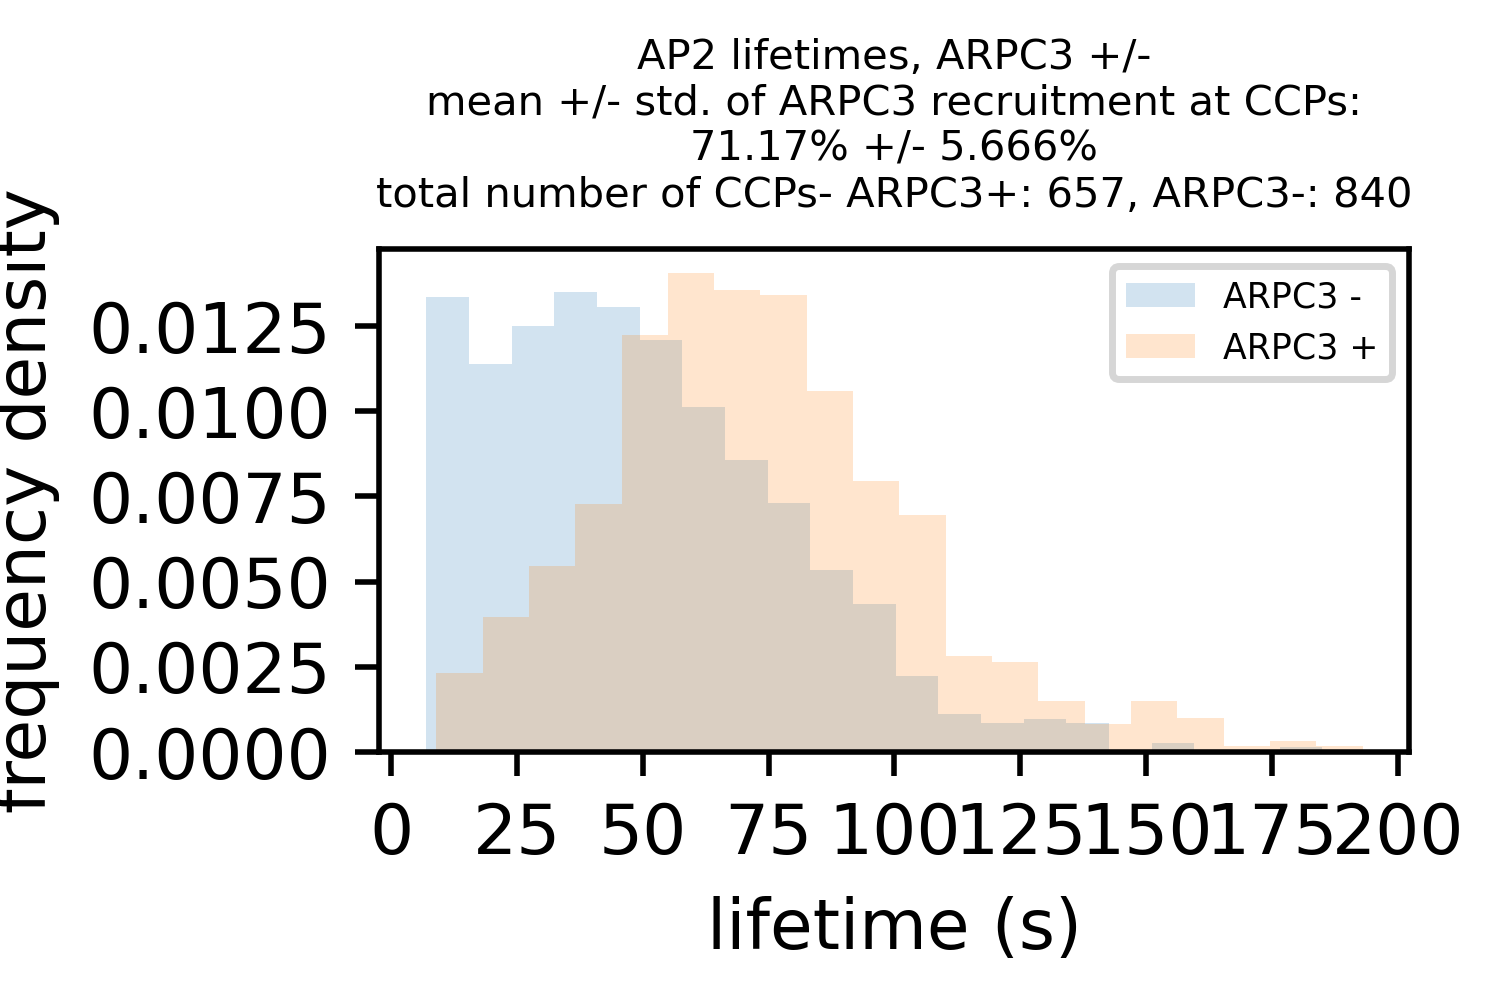

In [6]:
Image(filename=unique_user_saved_outputs+'/plots/ap2lifetimes_plusminus_arpc3_histogram_density_nonsigdnm2peak_zeropadding.png', height=500, width=500)

# CCP lifetimes (AP2 initiation to DNM2 peak) of ARPC3+/- events

In [7]:
%%capture

plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(3,2)
plt.hist(time_ap2_appearance_to_dnm2_peak_arpc3_negative, alpha=0.2, label='ARPC3 -', bins='auto', density=True)
plt.hist(time_ap2_appearance_to_dnm2_peak_arpc3_positive, alpha=0.2, label='ARPC3 +', bins='auto', density=True)
plt.rcParams.update({'font.size': 5})
plt.xlabel('lifetime (s)')
plt.ylabel('frequency density')
plt.title('CCP lifetimes, ARPC3 +/-'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n' + 
          str(np.around(100*np.mean(merged_results['fraction_arpc3_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_arpc3_positive']),3)) + '%' + 
          '\ntotal number of CCPs- ARPC3+: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_positive)) + 
          ', ARPC3-: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_negative)))
plt.legend()
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/ccplifetimes_plusminus_arpc3_histogram_density_nonsigdnm2peak_zeropadding.png')

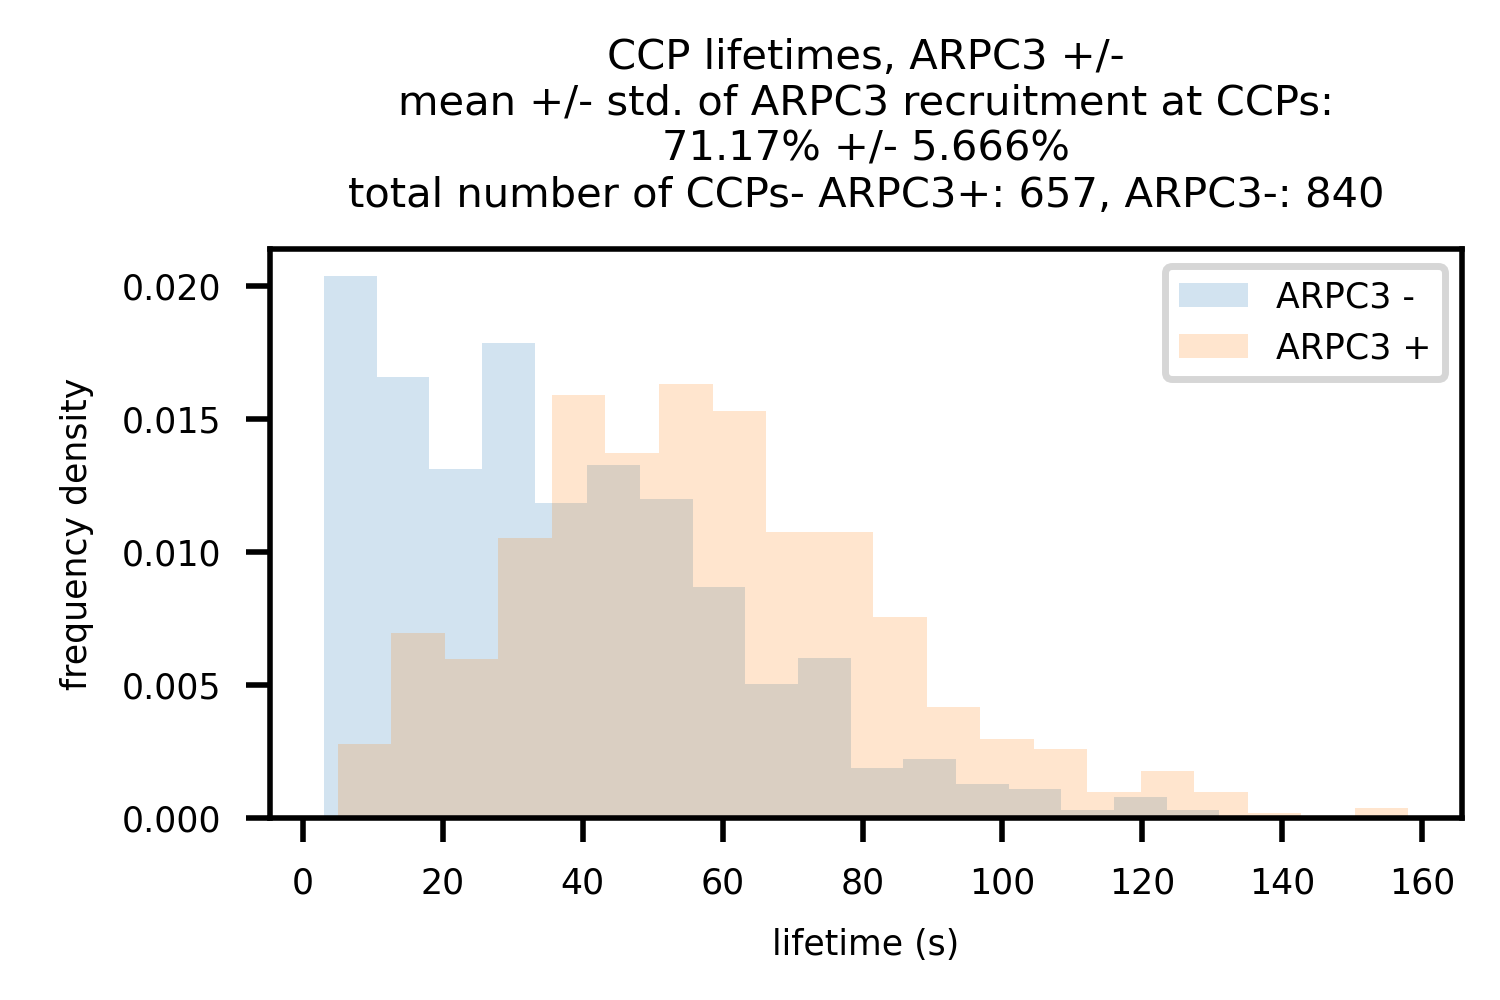

In [8]:
Image(filename=unique_user_saved_outputs+'/plots/ccplifetimes_plusminus_arpc3_histogram_density_nonsigdnm2peak_zeropadding.png', height=500, width=500)

# histogram of ARPC3 lifetimes

In [9]:
%%capture

plt.style.use('default')

plt.rcParams["figure.dpi"]=500
plt.rcParams["figure.figsize"]=(5,4)

plt.hist(arpc3_lifetime_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         label='ARPC3 lifetime',
         color='blue')

plt.legend(loc='upper right', framealpha=1)
plt.xlabel('time (s)')
plt.ylabel('frequency density')
plt.title('ARPC3+ events'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n ' + 
          str(np.around(100*np.mean(merged_results['fraction_arpc3_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_arpc3_positive']),3)) + '%' + 
          '\ntotal number of CCPs-- ARPC3+: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_positive)))
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/arpc3_lifetimes_nonsigdnm2peak_zeropadding.png')

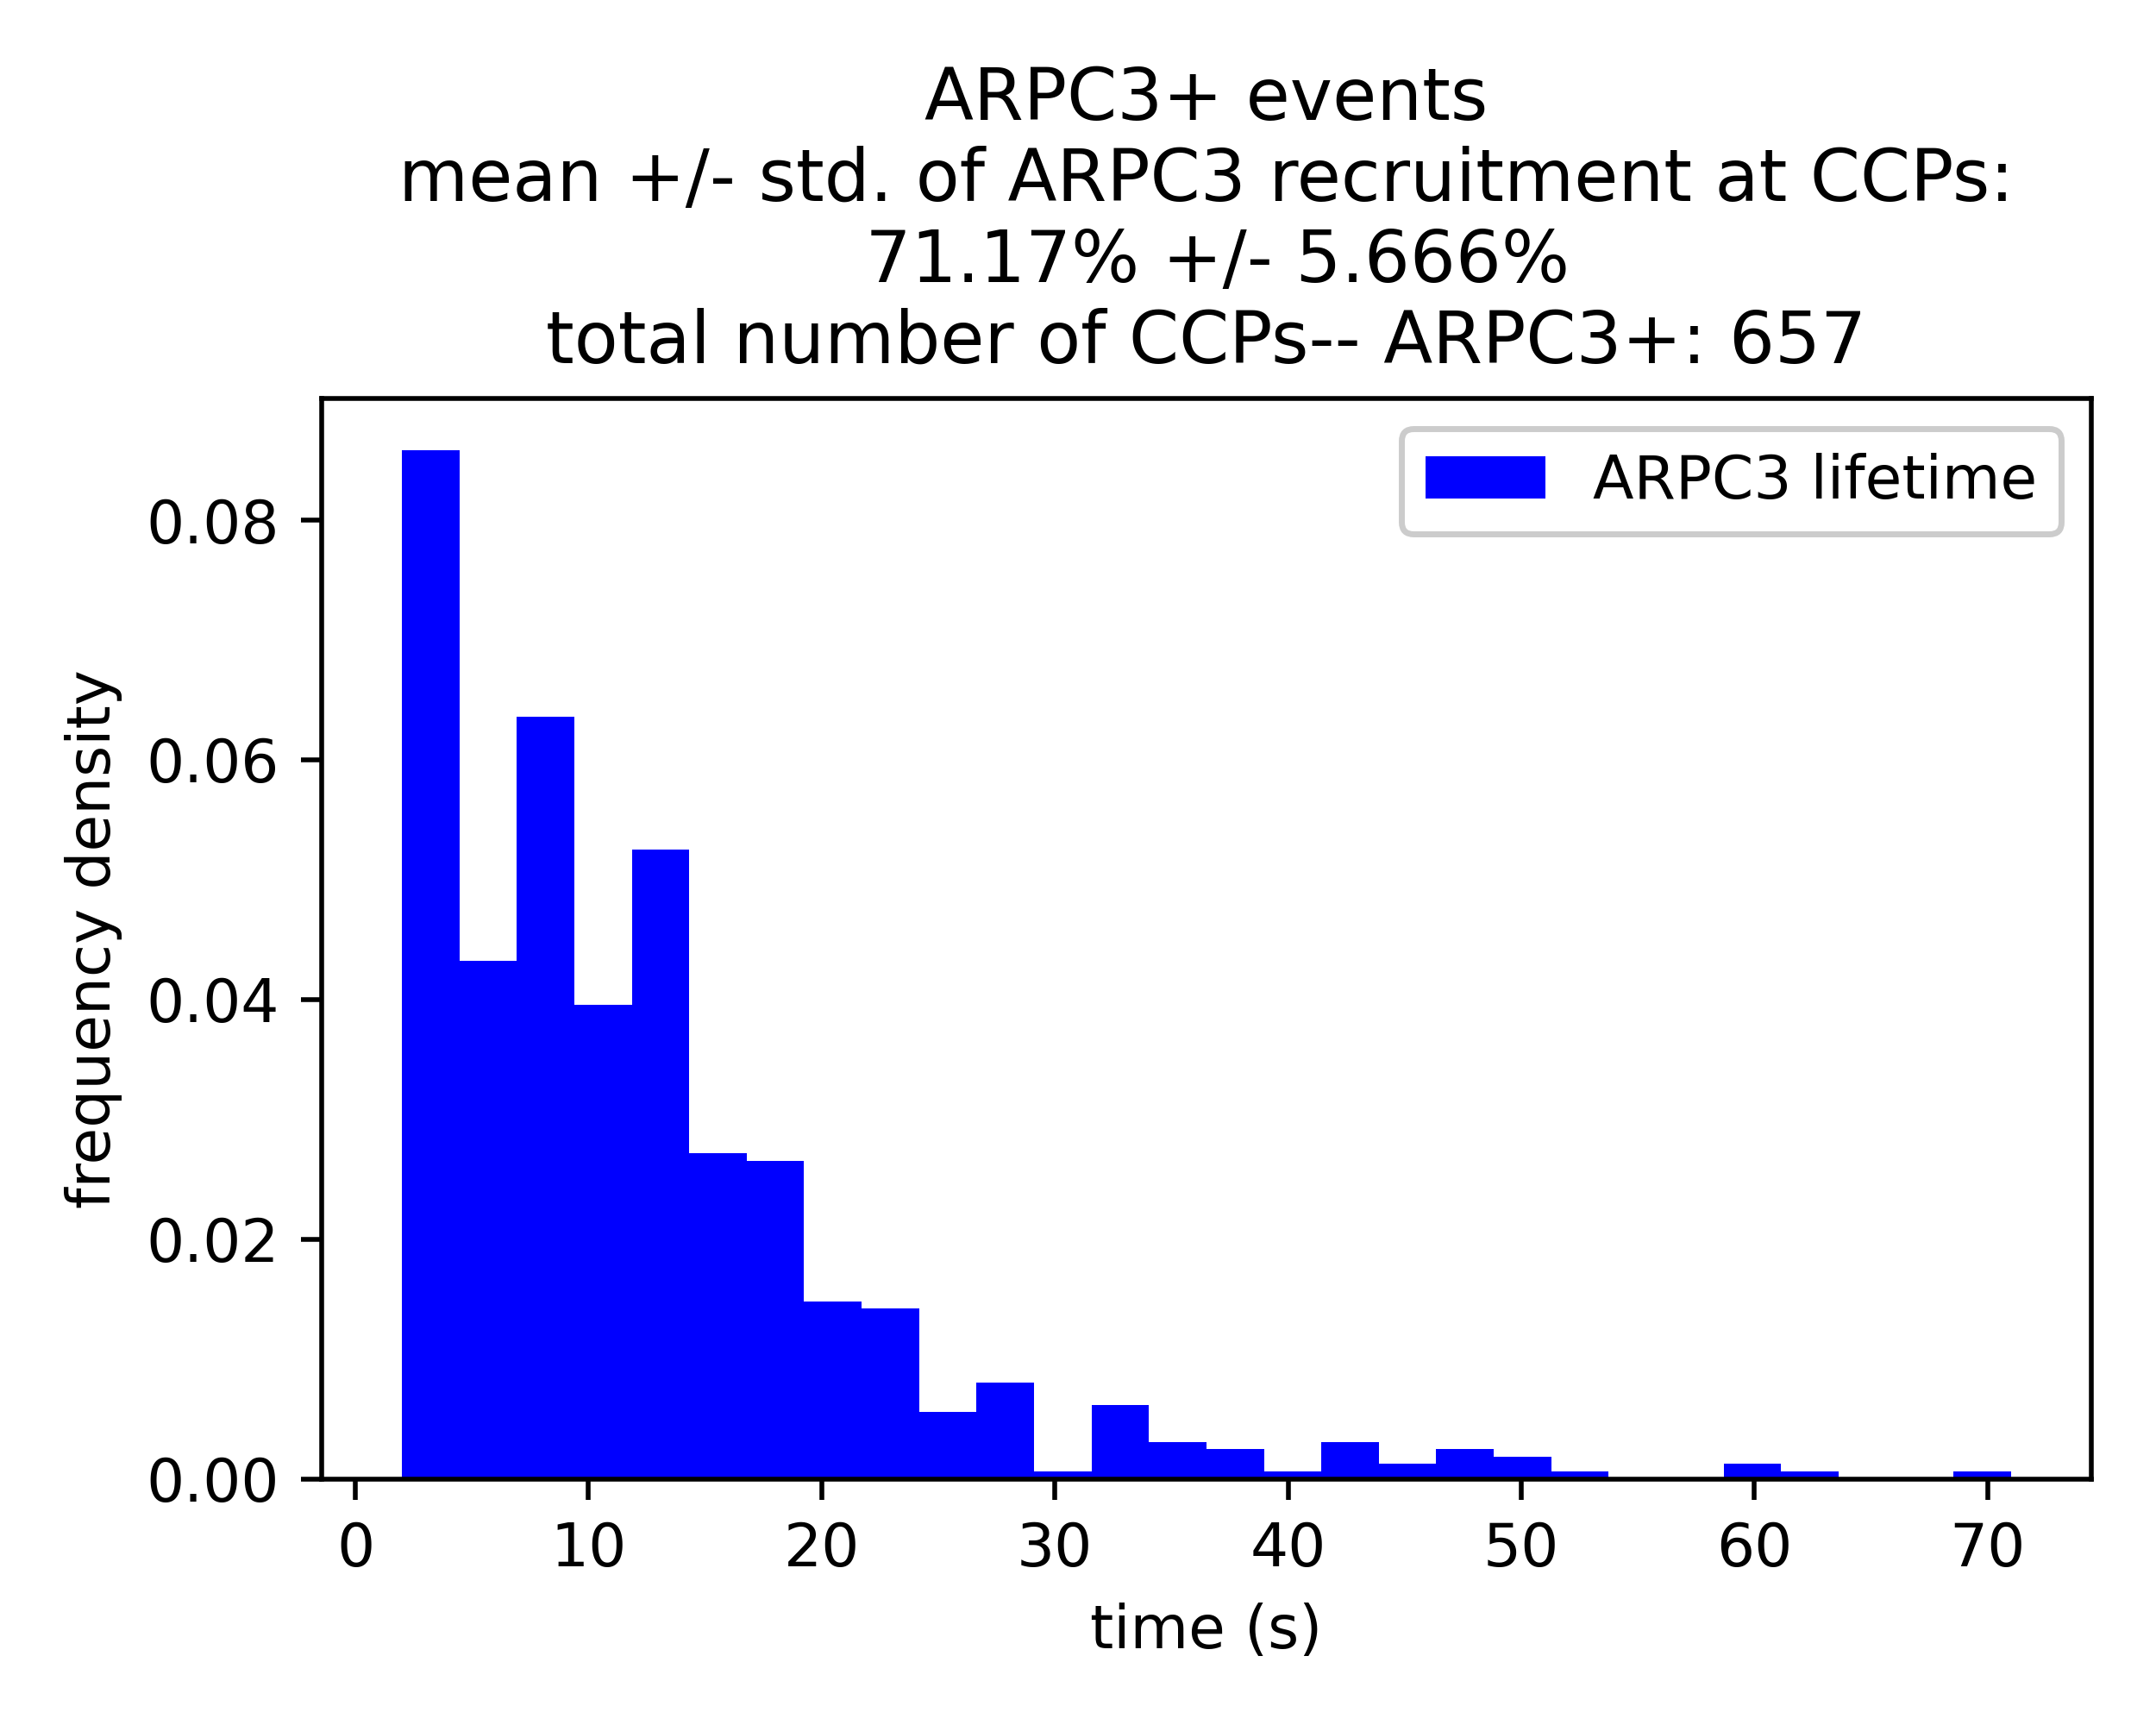

In [10]:
Image(filename=unique_user_saved_outputs+'/plots/arpc3_lifetimes_nonsigdnm2peak_zeropadding.png', height=500, width=500)

# ECDF of AP2 and CCP lifetimes, merged view

In [11]:
%%capture

plt.style.use('default')

plt.rcParams["figure.dpi"]=500
plt.rcParams["figure.figsize"]=(7,4)


plt.hist(time_ap2_appearance_to_dnm2_peak_arpc3_negative,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3-, CCP lifetime',
         color='blue',
         linestyle='dashed')
plt.hist(time_ap2_appearance_to_dnm2_peak_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3+, CCP lifetime',
         color='orange',
         linestyle='dashed')
plt.hist(ap2_lifetime_arpc3_negative,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3-, AP2 lifetime',
         color='blue',
         linewidth=3)
plt.hist(ap2_lifetime_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3+, AP2 lifetime',
         color='orange',
         linewidth=3)
plt.hist(time_arpc3_appearance_to_dnm2_peak_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3 initiation-to-scission',
         color='pink',
         linewidth=3,
         linestyle='dashed')
plt.hist(arpc3_lifetime_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3 lifetime',
         color='pink',
         linewidth=3)
plt.legend(loc='lower right', framealpha=1)
plt.xlabel('time (s)')
plt.ylabel('cumulative frequency')
plt.title('CCP events'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n ' + 
          str(np.around(100*np.mean(merged_results['fraction_arpc3_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_arpc3_positive']),3)) + '%' + 
          '\ntotal number of CCPs-- ARPC3+: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_positive)) + 
          ', ARPC3-: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_negative)))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/merged_lifetimes_arpc3_ecdfs_nonsigdnm2peak_zeropadding.png')

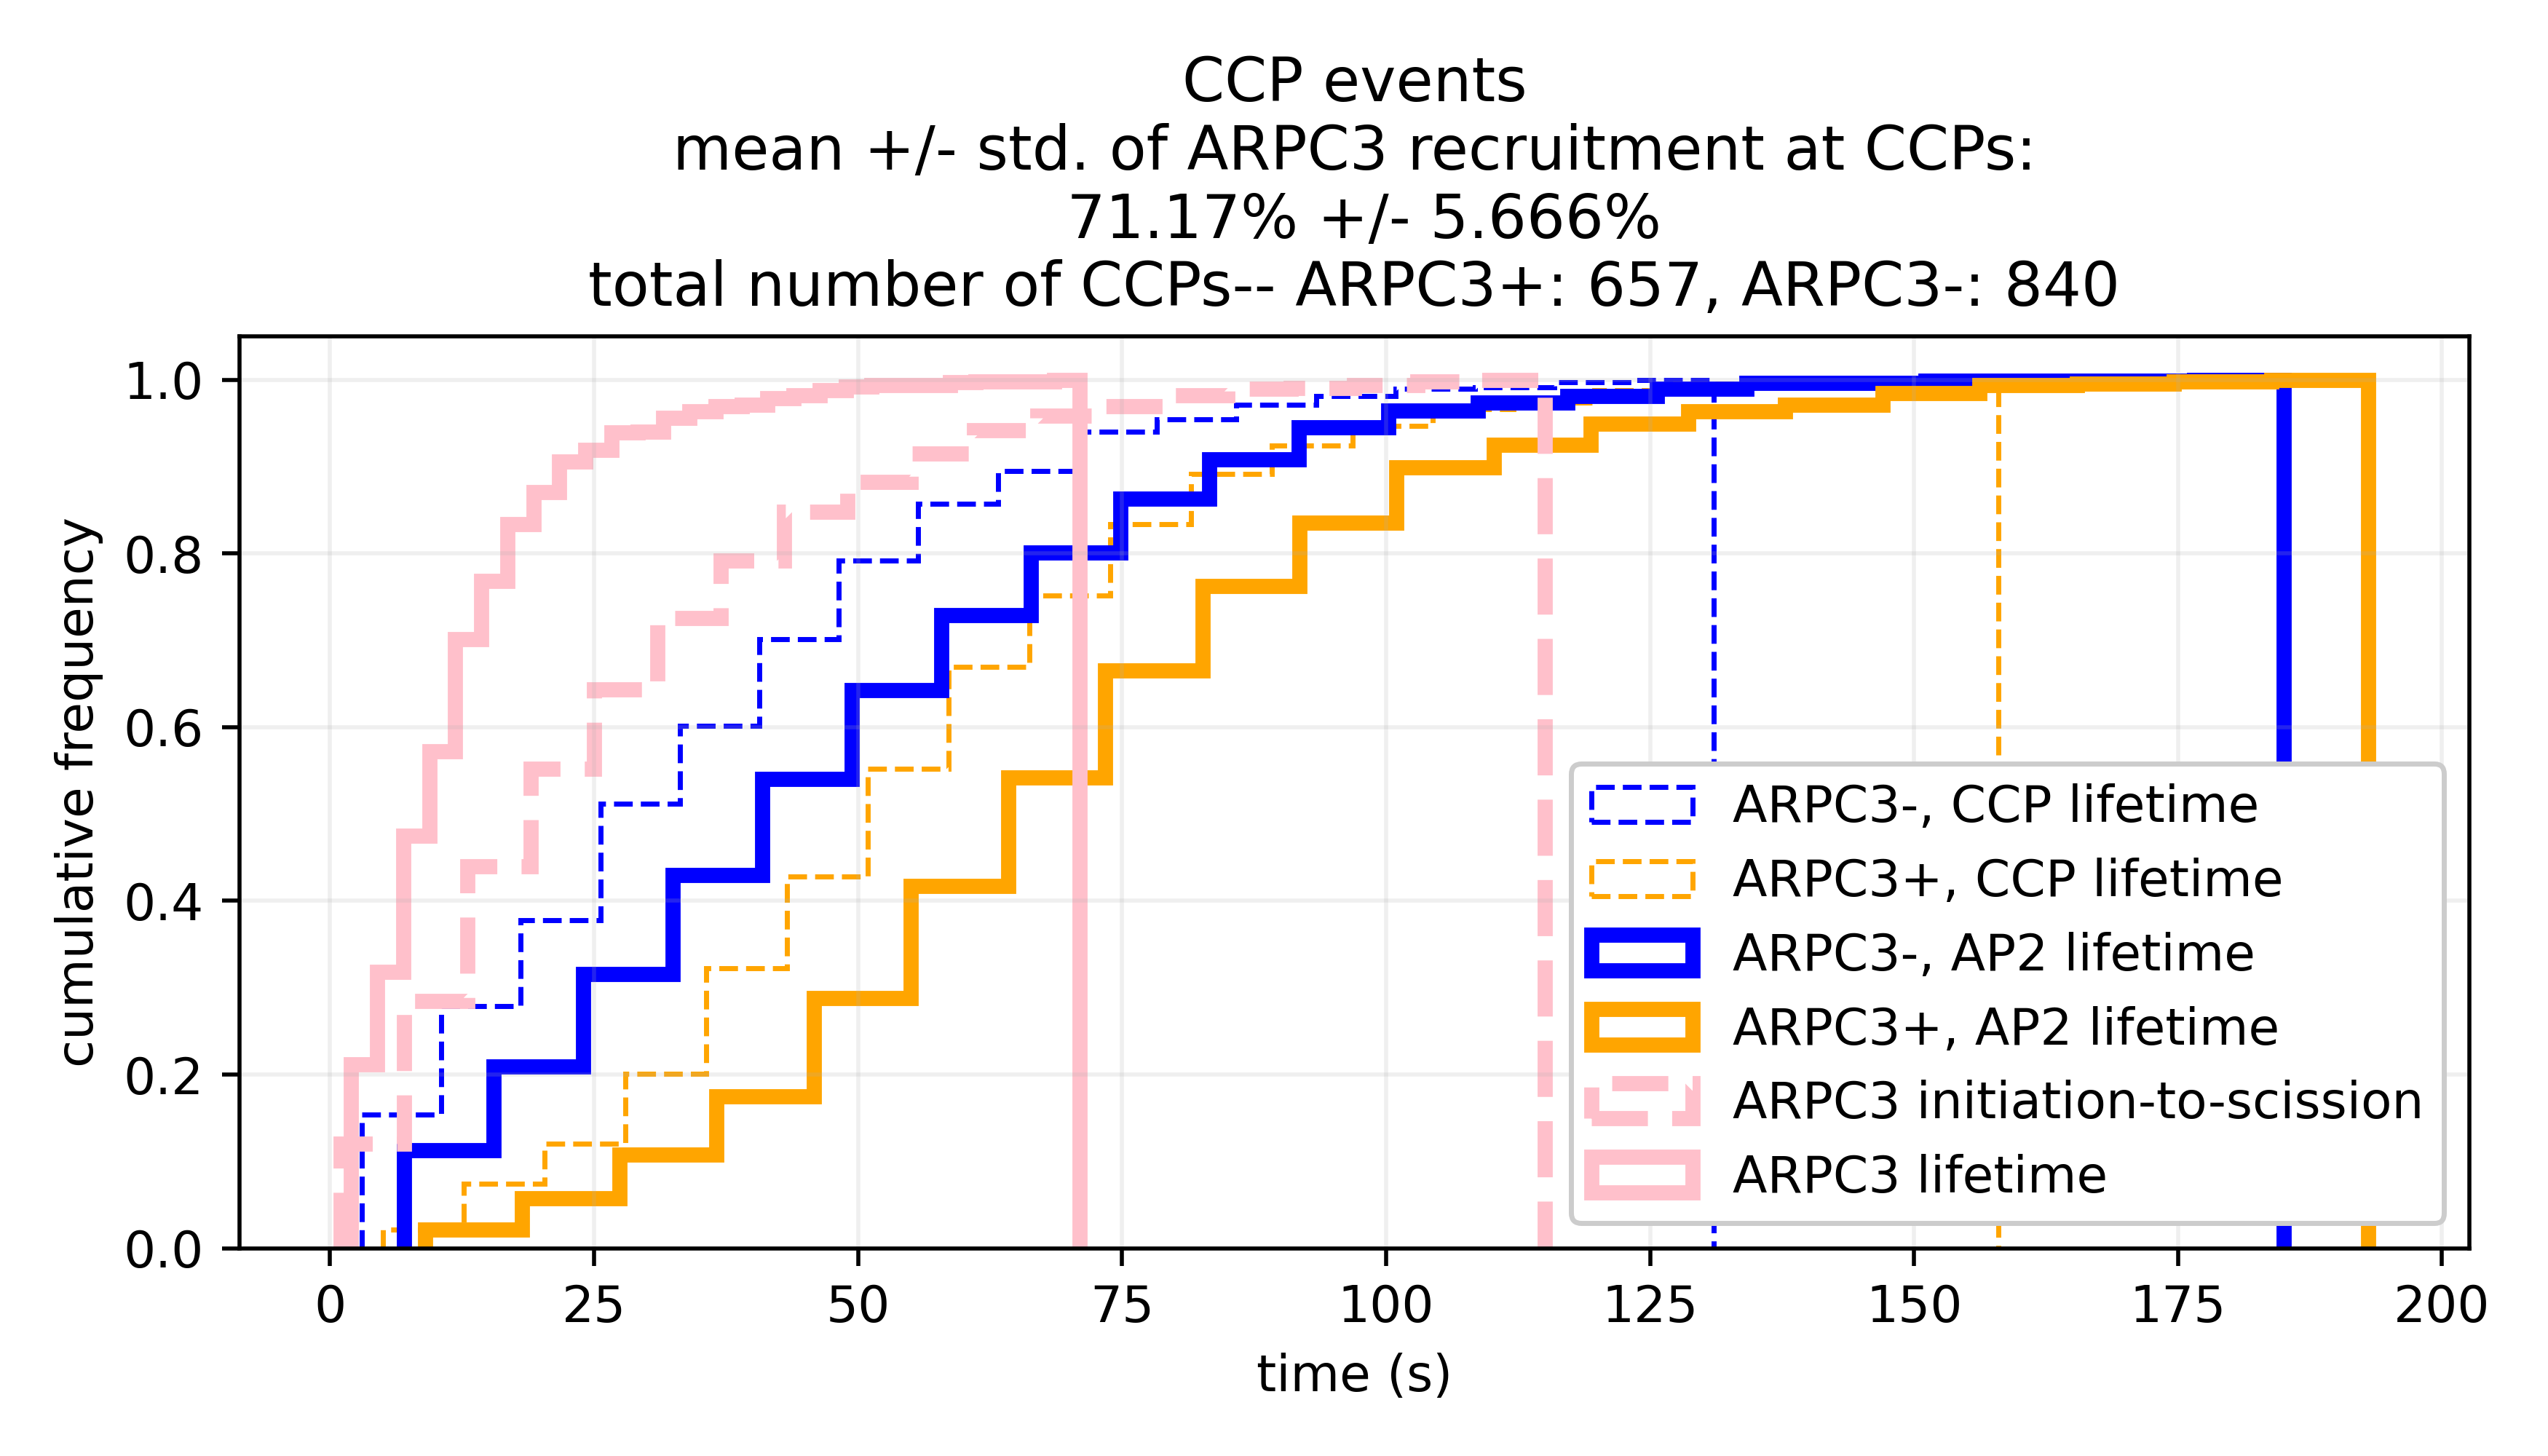

In [12]:
Image(filename=unique_user_saved_outputs+'/plots/merged_lifetimes_arpc3_ecdfs_nonsigdnm2peak_zeropadding.png', height=500, width=500)

# merge amplitudes of different channels

In [13]:
channel_amplitudes_arpc3_negative = []
for i in range(len(merged_results['ch0_vectors_arpc3_negative'])):
    channel_amplitudes_arpc3_negative.append([merged_results['ch0_vectors_arpc3_negative'][i],
                                              merged_results['ch1_vectors_arpc3_negative'][i],
                                              merged_results['channel_0_1_separations_arpc3_negative'][i]])

channel_amplitudes_arpc3_positive = []
for i in range(len(merged_results['ch0_vectors_arpc3_positive'])):
    channel_amplitudes_arpc3_positive.append([merged_results['ch0_vectors_arpc3_positive'][i],
                                              merged_results['ch1_vectors_arpc3_positive'][i],
                                              merged_results['ch2_vectors_arpc3_positive'][i],
                                              merged_results['channel_0_1_separations_arpc3_positive'][i],
                                              merged_results['channel_0_2_separations_arpc3_positive'][i]])
channel_amplitudes_arpc3_positive = np.array(channel_amplitudes_arpc3_positive)[indices_nonsig_arpc3_dnm2_peak]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# cohort plots of ARPC3+ CCPs

In [38]:
max(ap2_lifetime_arpc3_positive)

193

In [39]:
%%capture

plt.style.use('default')

fig, axes = plt.subplots(1, 1, dpi=500, figsize=(15,5))
# axes_separation = axes.twinx()

cohorts = [[min(ap2_lifetime_arpc3_positive),40],[40,60],[60,80],[80,193]]

offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'])

lines_0, labels_0 = axes.get_legend_handles_labels()
axes.legend(lines_0, labels_0, 
            loc='upper center', 
            bbox_to_anchor=(0.88, 0.8), 
            title="{:,}".format(len(channel_amplitudes_arpc3_positive)) + ' total events')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

text_horizontal_shifts = 3
text_percentage_y = 540
text_bounds_y = 560

for i in range(len(cohorts)):

    if i==0:
        axes.text(text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_arpc3_positive)) + '%')
    elif i==len(cohorts)-1:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime >}$'+str(cohorts[i][0])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_arpc3_positive)) + '%')
    else:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, str(cohorts[i][0])+'$\mathregular{s \leq lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_arpc3_positive)) + '%')
        
x_positions_ticks = []
x_labels_ticks = []
max_ticks_per_cohort = [[1, 1], [2, 2], [3, 3], [6, 3]]

for i in range(len(max_dnm2_cohort_indices)):
    

    num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
    num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
    for j in range(num_ticks_before):
        
        x_labels_ticks.append(-10*(j+1))
        x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
    
    x_labels_ticks.append(0)
    x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])
    
    for j in range(num_ticks_after):
        
        x_labels_ticks.append(10*(j+1))
        x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
axes.set_xticklabels(x_labels_ticks, minor=False)


axes.set_xlabel('time (s)') 
axes.set_ylabel('a.u. fluorescence')
axes.set_title('ARPC3+ CCPs, aligned to DNM2 peaks, binned in cohorts by AP2 lifetimes')
axes.set_xlim([0,offsets[-1]+cohorts[-1][-1]])    
axes.set_ylim([0,600])  
# axes_separation.set_ylim([0,.3])
plt.tight_layout()   
plt.savefig(unique_user_saved_outputs+'/plots/fig3aa_all_overlaid_ap2dnm2_arpc3plusccps_cohorts_centered_zero_nonsigdnm2peak_zeropadding.png')

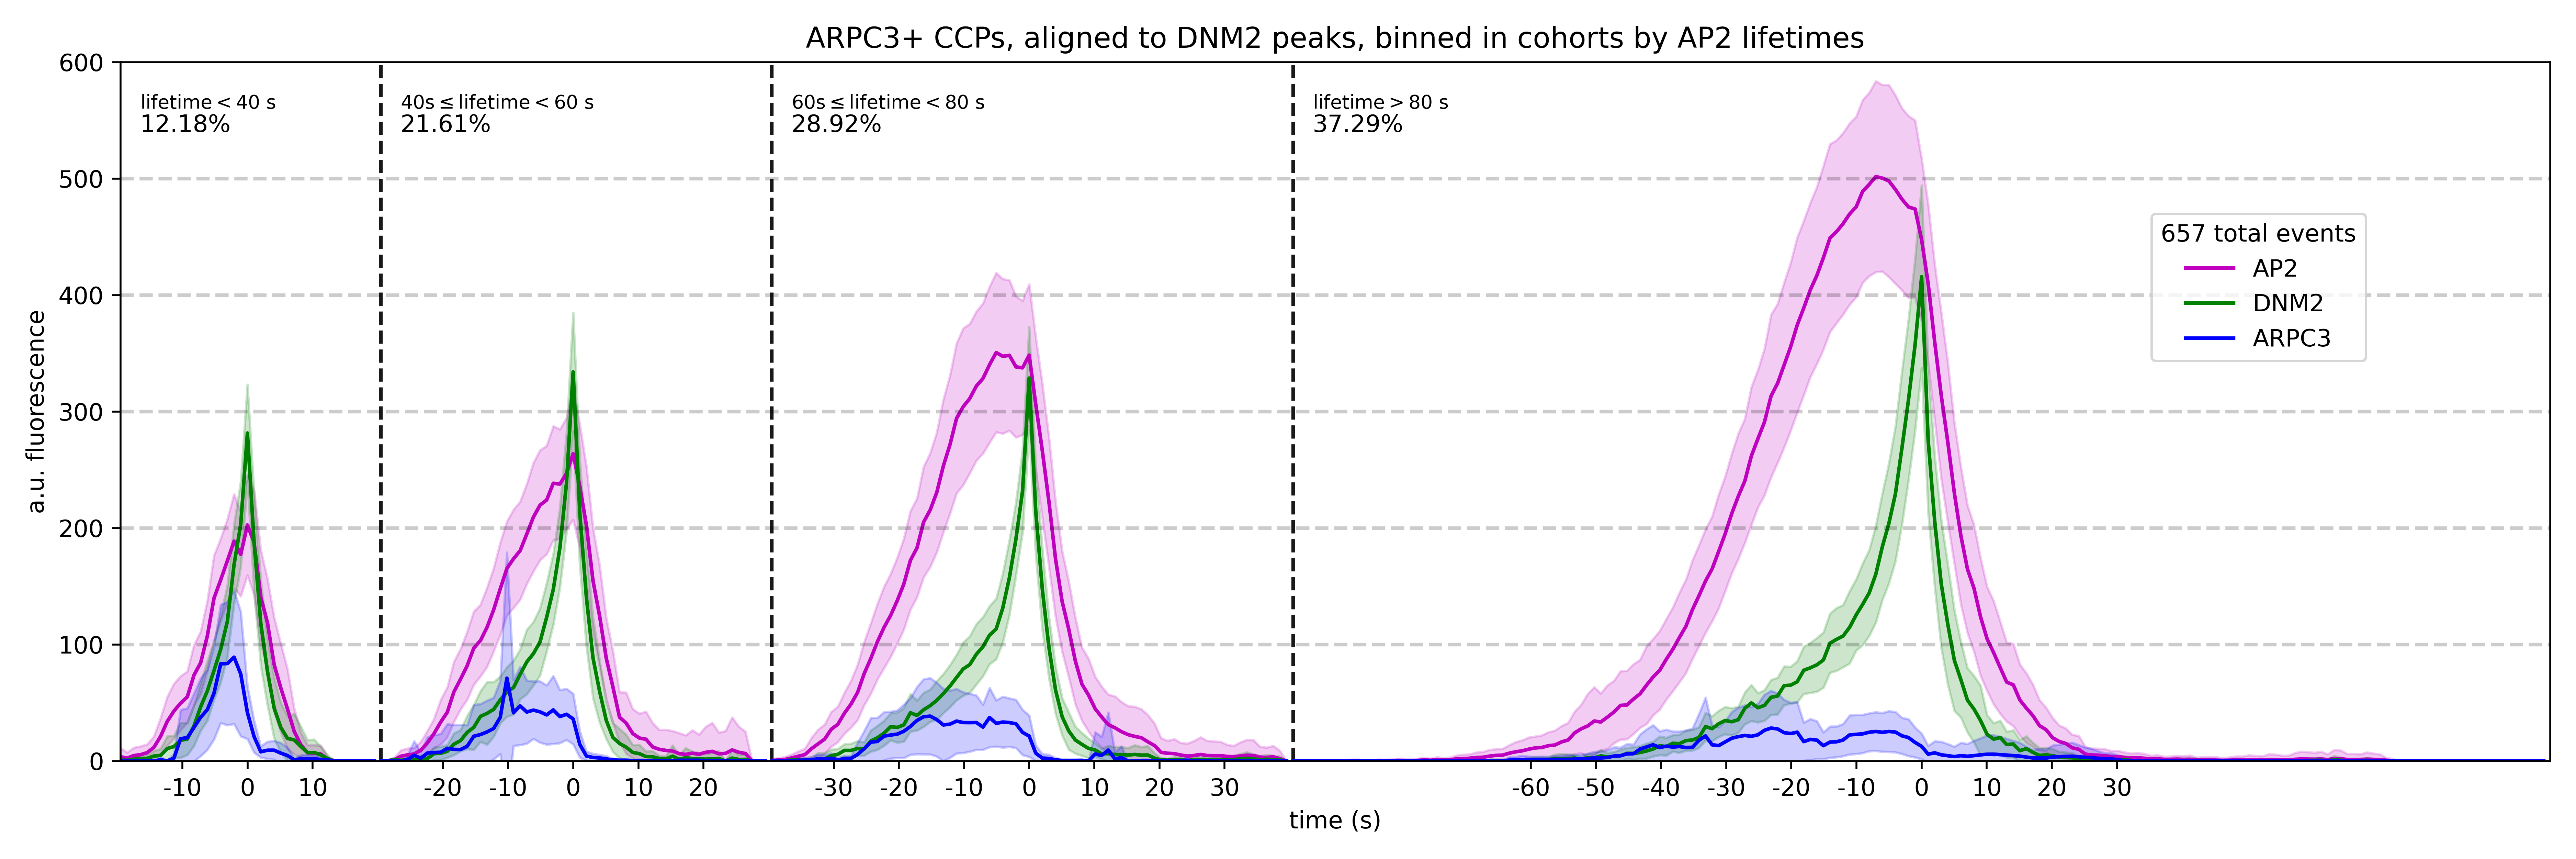

In [40]:
Image(filename=unique_user_saved_outputs+'/plots/fig3aa_all_overlaid_ap2dnm2_arpc3plusccps_cohorts_centered_zero_nonsigdnm2peak_zeropadding.png', height=500, width=500)

# ARPC3+ cohort with AP2/DNM2 and AP2/ARPC3 separation

In [16]:
%%capture

plt.style.use('default')
plt.rcParams['axes.spines.right'] = False

fig, axes = plt.subplots(1, 1, dpi=500, figsize=(6,4))
axes_separation = axes.twinx()

cohorts = [[min(ap2_lifetime_arpc3_positive), max(ap2_lifetime_arpc3_positive)]]

offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes, axes_separation], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [3, 4], 
                                                                         ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                                                         ['m', 'g', 'b', 'g', 'b'],
                                                                         line_cutoff_index=[3, 4],
                                                                         line_cutoff_regions=[[], [], [], [[0, 96-10], [96+5, 120]], [[0, 96-10], [96+5, 120]]])

lines_0, labels_0 = axes.get_legend_handles_labels()
lines_1, labels_1 = axes_separation.get_legend_handles_labels()
axes.legend(lines_0+lines_1, labels_0+labels_1, 
            loc='upper right',
            title="{:,}".format(len(channel_amplitudes_arpc3_positive)) + ' total events')
y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)


x_positions_ticks = []
x_labels_ticks = []
max_ticks_per_cohort = [[3, 2]]

for i in range(len(max_dnm2_cohort_indices)):
    

    num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
    num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
    
    for j in range(num_ticks_before):
        
        x_labels_ticks.append(-10*(j+1))
        x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
    
    x_labels_ticks.append(0)
    x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])
    
    for j in range(num_ticks_after):
        
        x_labels_ticks.append(10*(j+1))
        x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
axes.set_xticklabels(x_labels_ticks, minor=False)


axes.set_xlabel('time (s)') 
axes.set_ylabel('a.u. fluorescence')
axes.set_title('ARPC3+ CCPs, aligned to DNM2 peaks')
axes.set_xlim([50,120])    
axes.set_ylim([0,530])
axes_separation.set_ylim([0,0.5])
axes_separation.set_ylabel('separation (microns)')
axes.axvline(120, color='black', linewidth=5, linestyle='--')
plt.tight_layout()   
plt.savefig(unique_user_saved_outputs+'/plots/all_overlaid_ap2dnm2_arpc3plusccps_cohorts_overlaid_separation_zeropadding_nonsig.png')

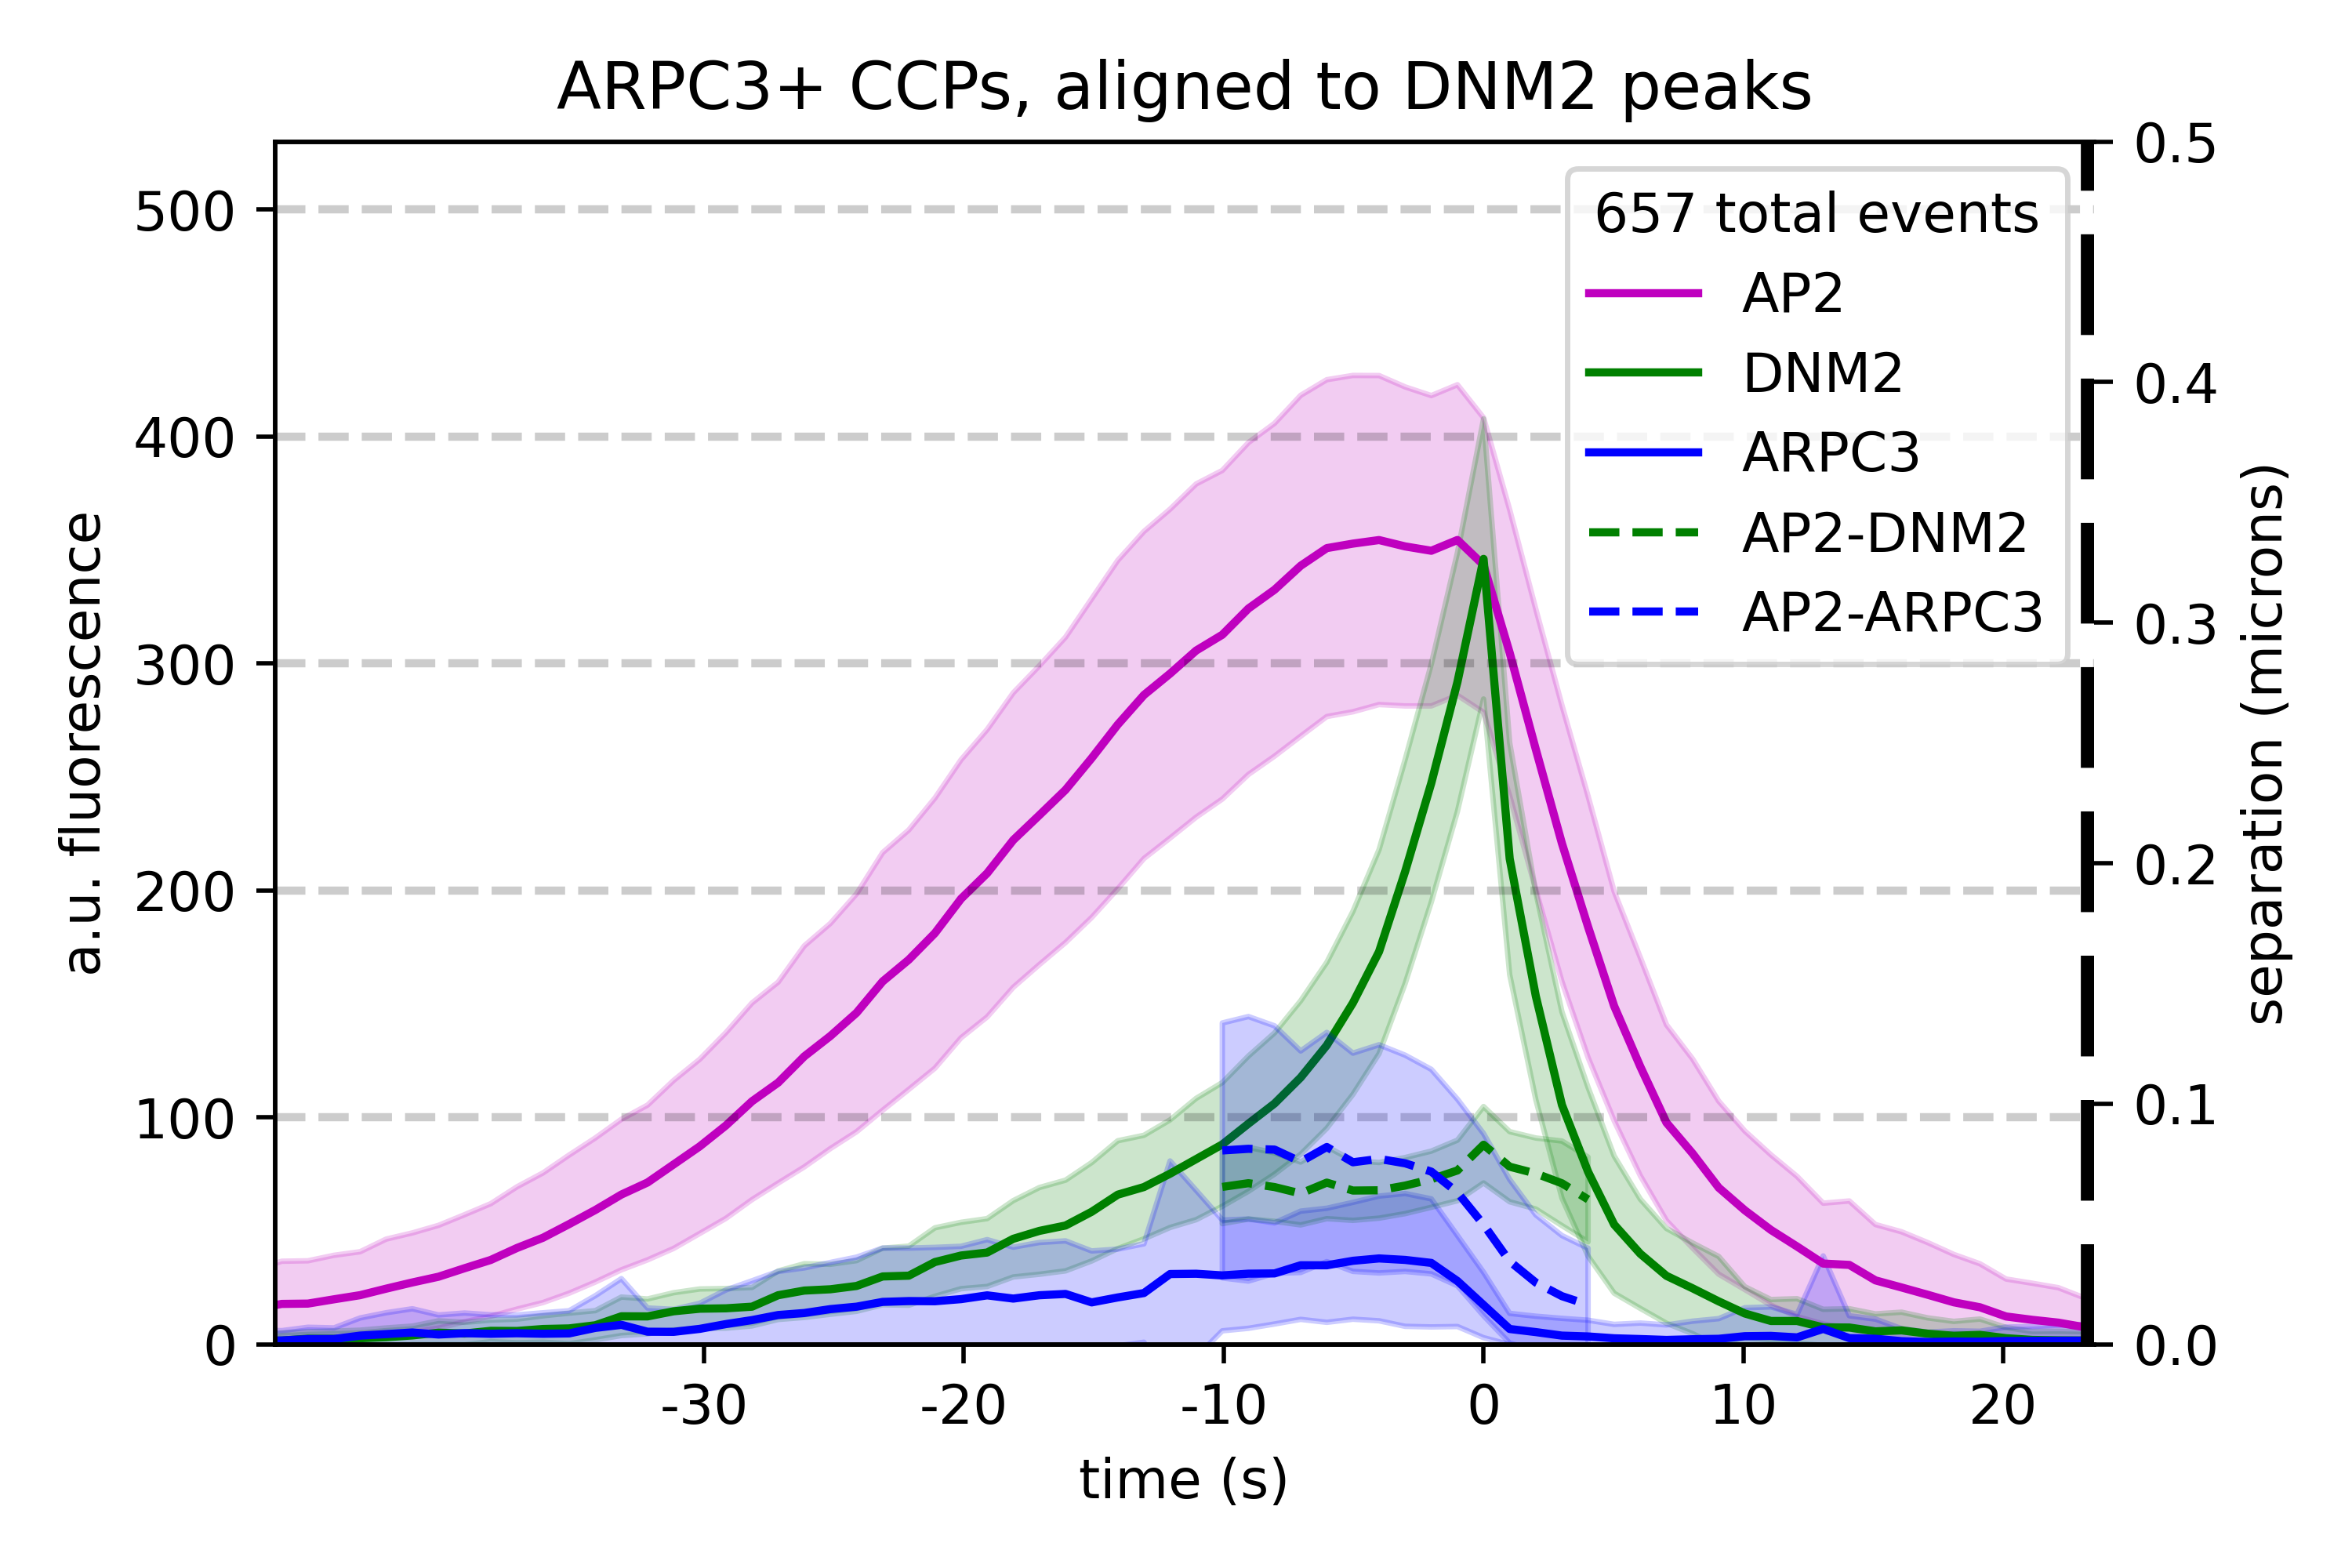

In [17]:
Image(filename=unique_user_saved_outputs+'/plots/all_overlaid_ap2dnm2_arpc3plusccps_cohorts_overlaid_separation_zeropadding_nonsig.png', height=500, width=500)

# calculating "straightness index" of tracks, +/- ARPC3

In [18]:
straightness_arpc3_positive_before = []
straightness_arpc3_negative_before = []

for i in range(len(ccps_arpc3_positive)):
    
    x_pos = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(ccps_arpc3_positive, i, 0)
    y_pos = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(ccps_arpc3_positive, i, 0)
    
    total_displacement = 0
    
    dnm2_peak = np.argmax(return_track_attributes.return_track_amplitude_no_buffer_channel(ccps_arpc3_positive, i, 1))
    
    try:

        span = range(dnm2_peak-10, dnm2_peak)
        
        for j in span:

                temp_disp = np.sqrt((x_pos[j+1]-x_pos[j])**2 + (y_pos[j+1]-y_pos[j])**2)

                total_displacement+=temp_disp
        
        end_to_end_displacement = np.sqrt((x_pos[span[-1]]-x_pos[span[0]])**2 + (y_pos[span[-1]]-y_pos[span[0]])**2)
        straightness_arpc3_positive_before.append(end_to_end_displacement/total_displacement)          
        
    except Exception:

        straightness_arpc3_positive_before.append(-1)

        

for i in range(len(ccps_arpc3_negative)):
    
    x_pos = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(ccps_arpc3_negative, i, 0)
    y_pos = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(ccps_arpc3_negative, i, 0)
    
    total_displacement = 0
    
    dnm2_peak = np.argmax(return_track_attributes.return_track_amplitude_no_buffer_channel(ccps_arpc3_negative, i, 1))
    
    try:

        span = range(dnm2_peak-10, dnm2_peak)
        
        for j in span:

                temp_disp = np.sqrt((x_pos[j+1]-x_pos[j])**2 + (y_pos[j+1]-y_pos[j])**2)

                total_displacement+=temp_disp
        
        end_to_end_displacement = np.sqrt((x_pos[span[-1]]-x_pos[span[0]])**2 + (y_pos[span[-1]]-y_pos[span[0]])**2)
        straightness_arpc3_negative_before.append(end_to_end_displacement/total_displacement)             
        
    except Exception:

        straightness_arpc3_negative_before.append(-1)
    
straightness_arpc3_negative_before = np.array(straightness_arpc3_negative_before)
straightness_arpc3_negative_before = straightness_arpc3_negative_before[np.where(straightness_arpc3_negative_before>0)[0]]
straightness_arpc3_positive_before = np.array(straightness_arpc3_positive_before)
straightness_arpc3_positive_before = straightness_arpc3_positive_before[np.where(straightness_arpc3_positive_before>0)[0]]

In [19]:
straightness_arpc3_positive_after = []
straightness_arpc3_negative_after = []

for i in range(len(ccps_arpc3_positive)):
    
    x_pos = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(ccps_arpc3_positive, i, 0)
    y_pos = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(ccps_arpc3_positive, i, 0)
    
    total_displacement = 0
    
    dnm2_peak = np.argmax(return_track_attributes.return_track_amplitude_no_buffer_channel(ccps_arpc3_positive, i, 1))
    
    try:

        span = range(dnm2_peak, dnm2_peak+10)
        
        for j in span:

                temp_disp = np.sqrt((x_pos[j+1]-x_pos[j])**2 + (y_pos[j+1]-y_pos[j])**2)

                total_displacement+=temp_disp
        
        end_to_end_displacement = np.sqrt((x_pos[span[-1]]-x_pos[span[0]])**2 + (y_pos[span[-1]]-y_pos[span[0]])**2)
        straightness_arpc3_positive_after.append(end_to_end_displacement/total_displacement)          
        
    except Exception:

        straightness_arpc3_positive_after.append(-1)


for i in range(len(ccps_arpc3_negative)):
    
    x_pos = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(ccps_arpc3_negative, i, 0)
    y_pos = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(ccps_arpc3_negative, i, 0)
    
    total_displacement = 0
    
    dnm2_peak = np.argmax(return_track_attributes.return_track_amplitude_no_buffer_channel(ccps_arpc3_negative, i, 1))
    
    try:

        span = range(dnm2_peak, dnm2_peak+10)
        
        for j in span:

                temp_disp = np.sqrt((x_pos[j+1]-x_pos[j])**2 + (y_pos[j+1]-y_pos[j])**2)

                total_displacement+=temp_disp
        
        end_to_end_displacement = np.sqrt((x_pos[span[-1]]-x_pos[span[0]])**2 + (y_pos[span[-1]]-y_pos[span[0]])**2)
        straightness_arpc3_negative_after.append(end_to_end_displacement/total_displacement)             
        
    except Exception:

        straightness_arpc3_negative_after.append(-1)
    
straightness_arpc3_negative_after = np.array(straightness_arpc3_negative_after)
straightness_arpc3_negative_after = straightness_arpc3_negative_after[np.where(straightness_arpc3_negative_after>0)[0]]
straightness_arpc3_positive_after = np.array(straightness_arpc3_positive_after)
straightness_arpc3_positive_after = straightness_arpc3_positive_after[np.where(straightness_arpc3_positive_after>0)[0]]

In [20]:
%%capture
plt.figure(dpi=500)
plt.hist(straightness_arpc3_negative_before, linestyle='--', bins='auto', color='blue', alpha=1, log=False, cumulative=True, histtype='step', density=True, label='ARPC3-, before scission');
plt.hist(straightness_arpc3_positive_before, linestyle='--', bins='auto', color='orange', alpha=1, log=False, cumulative=True, histtype='step', density=True, label='ARPC3+, before scission');
plt.hist(straightness_arpc3_negative_after, bins='auto', color='blue', alpha=1, log=False, cumulative=True, histtype='step', density=True, label='ARPC3-, after scission');
plt.hist(straightness_arpc3_positive_after, bins='auto', color='orange', alpha=1, log=False, cumulative=True, histtype='step', density=True, label='ARPC3+, after scission');
plt.xlabel('straightness-index')
plt.ylabel('cumulative frequency')
plt.legend(loc='upper left')
plt.title('straightness-index = \n(end-to-end displacement)/(sum of step-wise displacements)\n--->over times defined in interval')
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/straightness_index_merged_zero_nonsig.png')

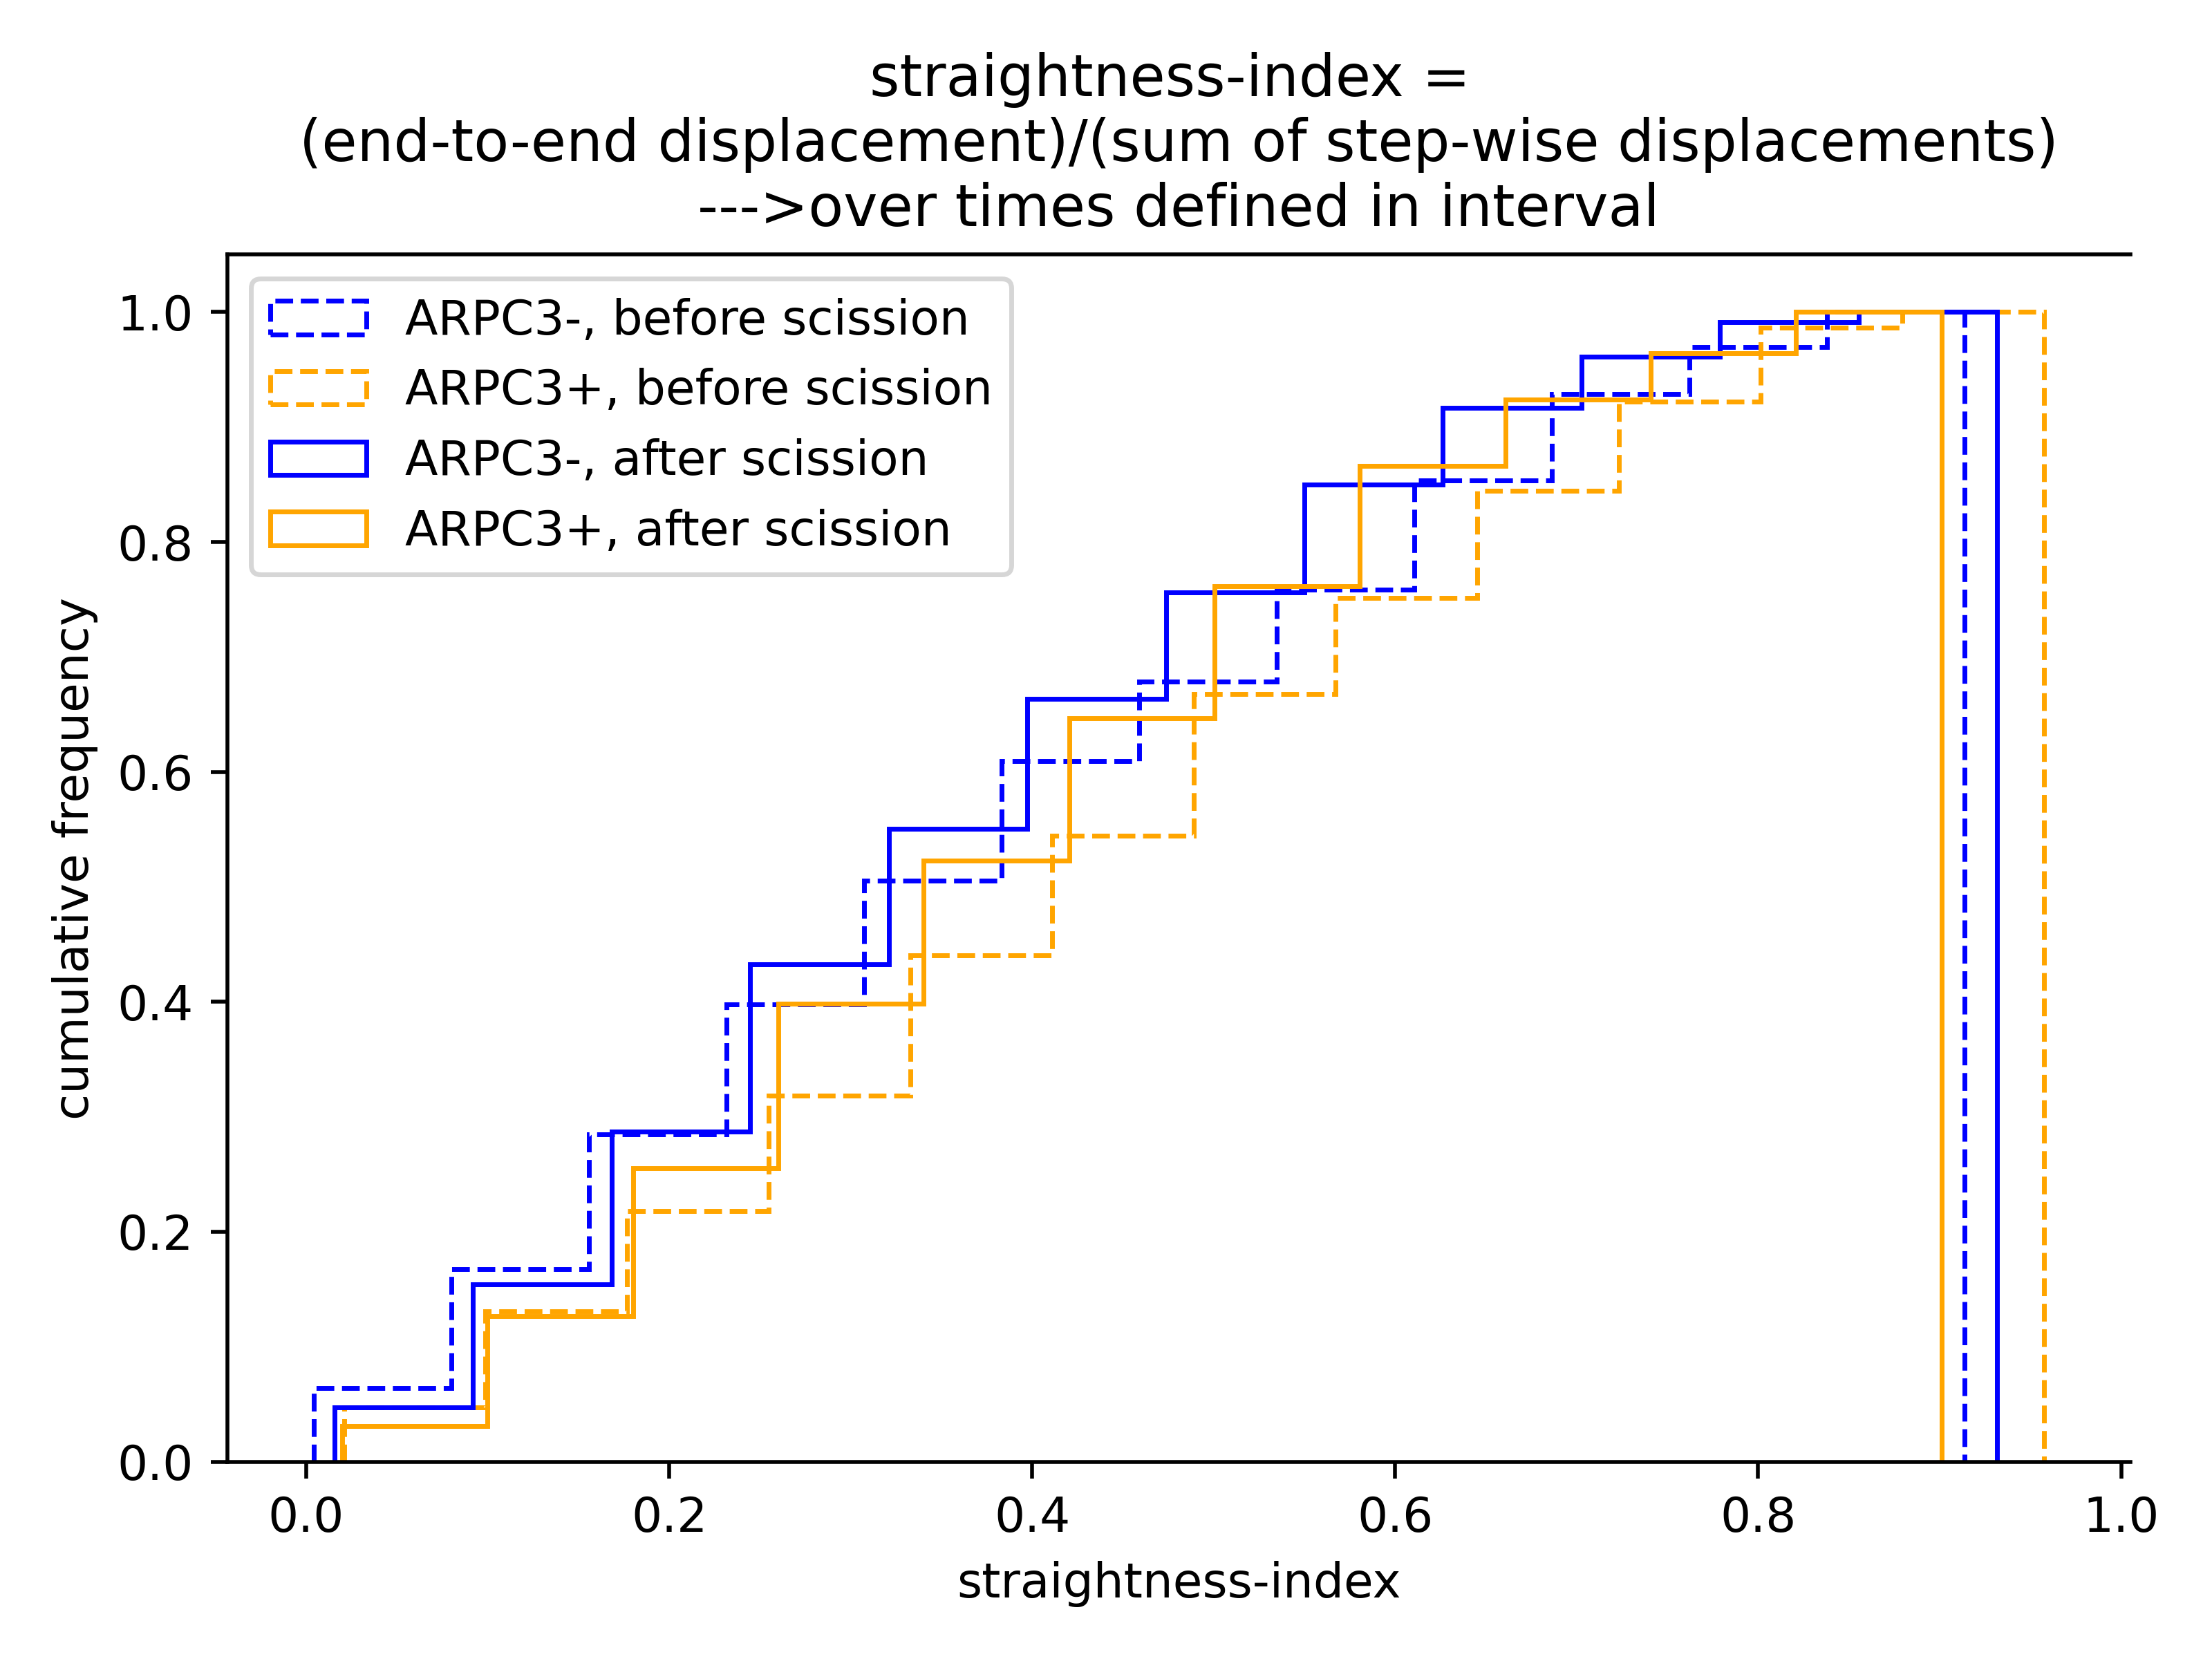

In [21]:
Image(filename=unique_user_saved_outputs+'/plots/straightness_index_merged_zero_nonsig.png', height=500, width=500)